In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt 

In [2]:
#função para plotar duas figuras 
def plot2fig(orig, edit):
    plt.figure(figsize = (10 , 10))
    plt.subplot(121)
    plt.imshow(orig,cmap = 'gray')
    plt.title('Original')
    plt.xticks([])
    plt.yticks([])
    plt.subplot(122)
    plt.imshow(edit ,cmap = 'gray')
    plt.title('Editada')
    plt.xticks([]), plt.yticks([])
    plt.show()

In [3]:
#função para plotar uma figura
def plot1fig(fig):
    plt.figure(figsize = (5 ,5))
    plt.grid(False)
    plt.imshow(fig,'gray')
    plt.show()

Teste 1 - Funções da biblioteca OpenCV

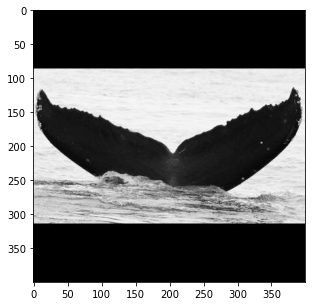

In [4]:
#Carrega imagem 
ori_img_gray = cv.imread('b.jpg', 0)
plot1fig(ori_img_gray)

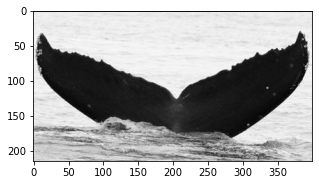

In [5]:
#corta imagem 
ori_img_gray = ori_img_gray[85:300, 0:400]
plot1fig(ori_img_gray)

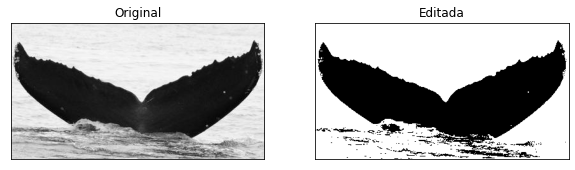

In [6]:
#aplica o algoritmo de threshold binario 
ret, thr_bin = cv.threshold(ori_img_gray, 130, 130, cv.THRESH_BINARY)
plot2fig(ori_img_gray,thr_bin)

In [7]:
#identifica os contornos
contours, heirarchy = cv.findContours(thr_bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

In [8]:
#ordena os contornos 
largest_areas = sorted(contours, key = cv.contourArea)

In [9]:
#cria uma mascara
mask = np.zeros(ori_img_gray.shape, np.uint8)

Agora vamos pegar o segundo contorno de maior área. Normalmente o primeiro pega a imagem inteira.

In [10]:

img_contour = cv.drawContours(mask,[largest_areas[-2]],0,(255, 255, 255, 255), -1)

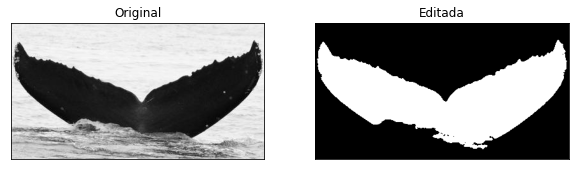

In [11]:
plot2fig(ori_img_gray, img_contour)

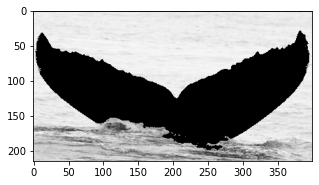

In [12]:
#removendo a cauda
for i in range(0, 215, 1):
    for j in range(0, 400, 1):
        if img_contour[i, j] == 255:
            ori_img_gray[i, j] = 0
            

plot1fig(ori_img_gray)

Vamos tentar aplicar a mesma metodologia em uma imagem mais complicada. 

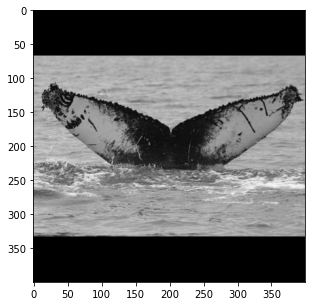

In [13]:
#carregando a imagem 
ori_img_gray = cv.imread('b2.jpg', 0)
plot1fig(ori_img_gray)

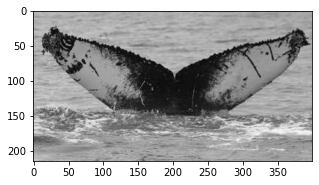

In [14]:
#corta imagem 
ori_img_gray = ori_img_gray[85:300, 0:400]
plot1fig(ori_img_gray)

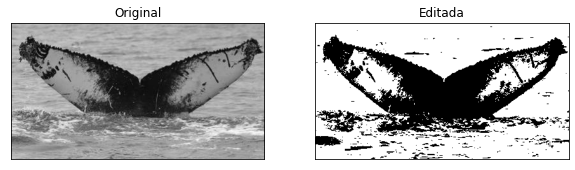

In [15]:
#aplica o algoritmo de threshold binario 
ret, thr_bin = cv.threshold(ori_img_gray, 130, 130, cv.THRESH_BINARY)
plot2fig(ori_img_gray,thr_bin)

In [16]:
#identifica os contornos
contours, heirarchy = cv.findContours(thr_bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

In [17]:
#ordena os contornos 
largest_areas = sorted(contours, key = cv.contourArea)

In [18]:
#cria uma mascara
mask = np.zeros(ori_img_gray.shape, np.uint8)

In [19]:
#pega o segundo contorno de maior area 
img_contour2 = cv.drawContours(mask,[largest_areas[-2]],0,(255, 255, 255, 255), -1)

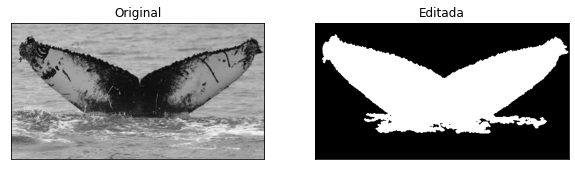

In [20]:
plot2fig(ori_img_gray, img_contour2)

Essa não funcionou muito bem, vamos tentar mexer um pouco na imagem original.  

In [21]:
#aplicação sucessiva de filtros 
med_img_gray = cv.medianBlur(ori_img_gray, 7)
gau_img_gray = cv.GaussianBlur(med_img_gray,(5, 5), 0)
med_img_gray = cv.medianBlur(gau_img_gray, 5)

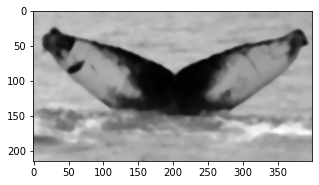

In [22]:
plot1fig(med_img_gray)

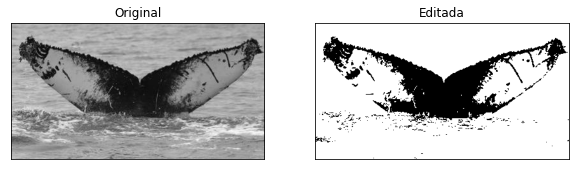

In [23]:
#aplicação do threshold binario para 
ret, thr_bin = cv.threshold(ori_img_gray, 90, 130, cv.THRESH_BINARY)

# Note que a parte do mar não foi inserida no threshold
# contudo a cauda não está totalmente fechada. 

plot2fig(ori_img_gray,thr_bin)

In [24]:
#pegando os contornos 
contours, heirarchy = cv.findContours(thr_bin, cv.RETR_LIST, cv.CHAIN_APPROX_SIMPLE)

In [25]:
# gera mascara 
mask = np.zeros(ori_img_gray.shape, np.uint8)
mask2 = np.zeros(ori_img_gray.shape, np.uint8)
# organiza os contornos do menor par ao maior 
largest_areas = sorted(contours, key = cv.contourArea)

# aplica o contorno 
img_contour = cv.drawContours(mask,[largest_areas[-2]],0,(255, 255, 255, 255), -1)

In [26]:
# Vamos pegar o maior contorno e aplicar um método convexo para
# criar uma novo contorno sem muitos detalhes

hull = cv.convexHull(contours[-2], True) 

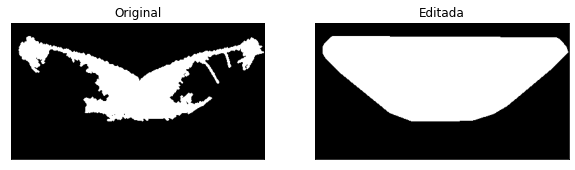

In [27]:
img_hull = cv.drawContours(mask2,[hull],0,(255, 255, 255), -1, 8)
plot2fig(img_contour, img_hull)

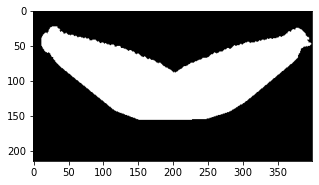

In [28]:
# Agora vamos usar o contorno e a mascara que estava com "buracos" 
# para retirnar esses buracos, faremos isso aplicando uma operação bit a bit do tipo and
img_new  = cv.bitwise_and(img_hull, img_contour2, mask = None) 
plot1fig(img_new)


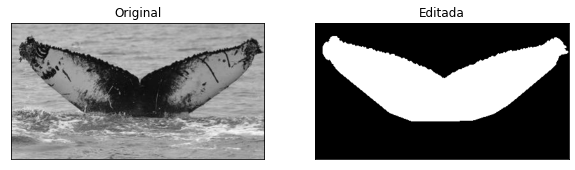

In [29]:
plot2fig(ori_img_gray, img_new)

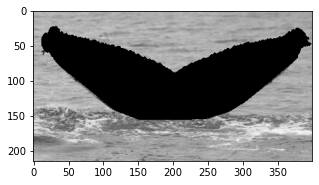

In [30]:
img_gray = cv.imread('b2.jpg', 0)
# removendo a cauda
for i in range(0, 215, 1):
    for j in range(0, 400, 1):
        if img_new[i, j] == 255:
            ori_img_gray[i, j] = 0
            

plot1fig(ori_img_gray)

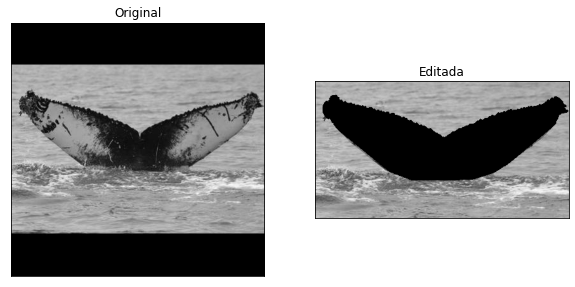

In [31]:
plot2fig(img_gray, ori_img_gray)

A ideia é tentar achar uma forma geral para colocar dentro de alguma função ou objeto. 
Até agr eu achei interessante esses resultados.

Teste 2 - Algoritmo de clusterização K-means da biblioteca sklearn.

In [32]:
from sklearn.cluster import KMeans  

In [33]:
gau_img_gray = cv.GaussianBlur(med_img_gray,(3, 3), 0)

X = gau_img_gray.reshape(-1, 1)
kmeans  = KMeans(n_clusters = 2).fit(X)
seg_img = kmeans.cluster_centers_[kmeans.labels_]
seg_img = seg_img.reshape(ori_img_gray.shape)

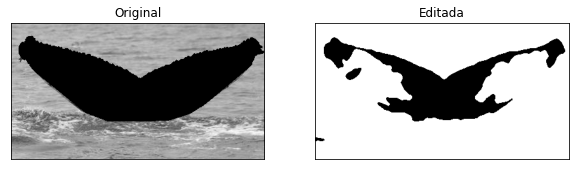

In [34]:
plot2fig(ori_img_gray, seg_img)

Teste 3 - Algoritmo de clusterização K-means da OpenCV

In [35]:

Z = gau_img_gray.reshape((-1,1))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 0.1)
K = 2
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((gau_img_gray.shape))

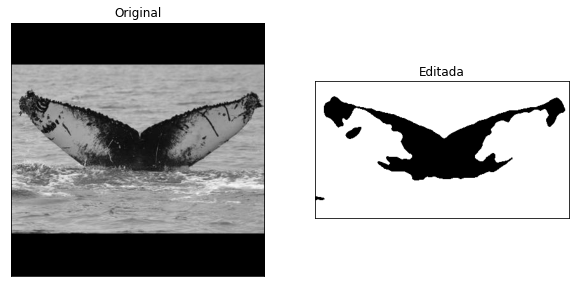

In [36]:
plot2fig(img_gray, res2)

In [ ]:
Teste 4 - Algoritmo de segmentação da biblioteca scikit-image. 

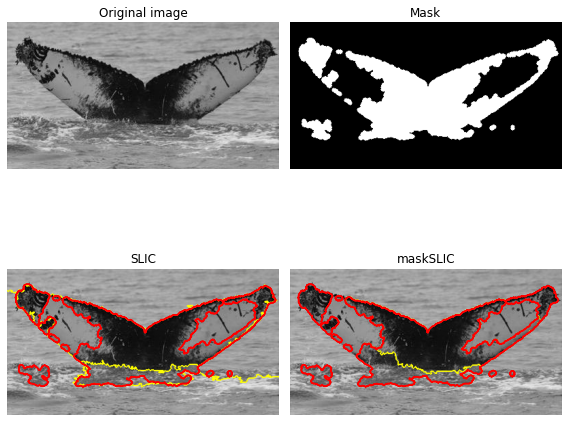

In [120]:
import matplotlib.pyplot as plt
from skimage import data
from skimage import color
from skimage import morphology
from skimage import segmentation

import numpy as np
import cv2 as cv

# Input data
entrada = cv.imread('b2.jpg') 

img = entrada[85:300, 0:400]

# Compute a mask
lum = color.rgb2gray(img)
mask = morphology.remove_small_holes(morphology.remove_small_objects(lum < 0.5 , 500), 500)

mask = morphology.opening(mask, morphology.disk(3))

# SLIC result
slic = segmentation.slic(img, n_segments = 5, start_label = 1)

# maskSLIC result
m_slic = segmentation.slic(img, n_segments = 5, mask = mask, start_label = 1)

# Display result
fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(8, 8))

ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img)
ax1.set_title('Original image')

ax2.imshow(mask, cmap='gray')
ax2.set_title('Mask')

ax3.imshow(segmentation.mark_boundaries(img, slic))
ax3.contour(mask, colors='red', linewidths=1)
ax3.set_title('SLIC')

ax4.imshow(segmentation.mark_boundaries(img, m_slic))
ax4.contour(mask, colors='red', linewidths=1)
ax4.set_title('maskSLIC')

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

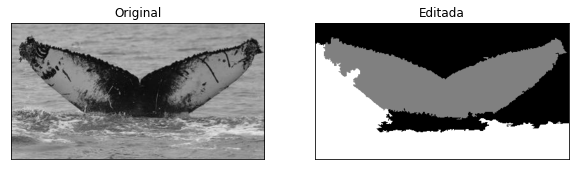

In [121]:
entrada = cv.imread('b2.jpg') 
img_gray = entrada[85:300, 0:400]
plot2fig(img_gray, slic)

for i in range(0, 215, 1):
    for j in range(0, 400, 1):
        if 1 < slic[i, j] < 3:
            slic[i, j] = 0
        else:
            slic[i, j] = 255

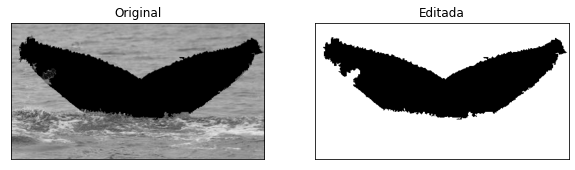

In [122]:
# removendo a cauda
for i in range(0, 215, 1):
    for j in range(0, 400, 1):
        if slic[i, j] ==  0:
             img_gray[i, j] = 0
            

plot2fig(img_gray, slic)

A biblioteca scikit-image (https://scikit-image.org/) é propria para o processamento de imagens em Python, ela me parece mais simples e com mais recursos que a OpenCV e Pillow, acho que seria uma boa a gente dedicar um tempinho a ela, pois, note que, com pouco código ela conseguiu fazer uma segmentação melhor que as outras testadas anteriormente. 